1. Begin with an executive summary:


   - What is your goal?
   
   To solve the question 'To what extent do the president's tweets contribute to s&p500 futures imminent price volatility?' using a wealth of regression-based models to eventually refine into a predictive tool for future tweets.
   
   - What are your metrics?
   
   
   -> price volatility, measured by:
   
       -> the difference between the open and close s&p prices each minute after  Trump tweets, for 5 mins
       -> the difference between the open and high s&p prices for each minute after Trump tweets, for 5 mins
      
      
   -> Sustained volume volatility,measured by:
       
       -> whether the average volume 20 mins after the tweet is greater than the average volume of trades that hour (check)
       
      
   -> from 'price volatility', significant change, quantified by a 0.1% or greater change in either the minimum or maximum of both price volatility measures
   
   
 
   - What were your findings?
   
   
   -> TBC
   
   
   
   - What risks/limitations/assumptions affect these findings?
   
   -> Generalisation
   
       -> Given the data was gathered from 2016, many of the tweets driving 'significant' volatility in price were politically specific to the 2016 election race. This included candidates such as Ted Cruz and Jeb Bush becoming key men in the race against Trump becoming President. To potentially avoid this, I attempted Latent Semantic Analysis to reduce the number of features in the count vectorized matrix, by grouping words into components. By doing so, I could theoretically categorize words into specific themes associated with cuasing volatile price movements; presidential race, federal reserve, economic (specifically monetary policy,  currencies (USD focus) and trade. I could steer away from specific names, and try to spot the presence of other terms that would still be there if there were other people up against Trump in the 2020 preisdential race, or another country Trump picked to have a trade war. I could also perform this task using NER through spacy, where I would look for certain entities in a sentence; a person, geographical place, economic term etc. and by generalising, prevent any overfitting from my model. 
       
       
    -> Reverse Causality
    
        -> Does the market move Trump? He has been subject to a lot of accusations on currency manipulation, as well as being prompted to tweet more contentiously as the markets have become more volatile. This issue of reverse causality, could be a problem, with the Presidential election coming up next year, and the trade ralationship with China hitting an all-time low, it is difficult to tell whether he has ridden the wave of volatility, or has directly contributed to it, particulraly in the recent months
        
        
     -> Sentiment Analysis for Trump
     
        -> For Donald Trump, his inconsistencies in level of sarcasm, as well as inconsistent use of language in a variety of different contexts, make it very difficult to find the best sentiment library to truly reflect the level of negativity or positivity in his tweets. Moreover, his use of certain words like 'growth' in an economic context, and therefore a context of this hypothesis, is misinterpreted by many sentiment libraries, with vader sentment giving it an extremely mild score. Maybe in years to come, financial/economically important terms will be given a greater weight whether in existing sentiment libraries or new ones. I did experiemnt with one financial sentiment library, however, it was missing a fair few words.
   

    -> Inability to capture reaction
    
        -> Given the very short timeframe used to measure the significance of the impact, we are unable to tell the compounded impact of many of the tweets with regards to reactions from other very influential twitter accounts. Running a sentiment analysis on giant news outlets and other important twitter figures' reactions may have provided us with a more accurate insight, as the language used would be generally less sarcastic more consistent.
        


2. Walk through your model step by step, starting with EDA



   - What are your variables of interest?
   
   
   -> y = significant price change
   
   -> x = vader compound score, dummy variables for hour, dummy variables for key words for tweets from 2016 -> Aug 2018
   
   - What outliers did you remove?
   
   
   -> I trialled removing half of my dependant variable data and only collecting tweets from 2018. This was because of the variety of the topics Trump tweets about, and because my hypothesis of trade and monetary policy being the overriding themes causing a significant price change.
   
   - What types of data imputation did you perform?
   
   -> n/a

3. Summarize your statistical analysis, including:


   - model selection
   
    -- KNNeighbours
    
    
    -- Multinomial Naïve Bayes
    
    
    -- Random Forest Classifier


    -- Logistic Regression with L1 and L2 penalty


    -- SVM & Linear SVM Models


        -> All of which have a selction of different parameters that have been tuned individually, through a gridsearch function. Prior to that, I tried LSA (Latent Semantic Analysis) to perform dimensionality redction on my tfidf to categorise trump’s tweets to either subset on relevant tweets or introduce dummy variables. Unfortunately, the number of tweets and inconsistency of tweeting patterns meant LSA struggled to capture any themes other than those tweets that had no significant impact on the S&P500

   
   - implementation
   
   -> See the function highlighted in 'Sentiment Analysis' under the 'implementation' section
   
   - evaluation (finish tomorrow)


   -> My original scores needed some severe improvement - I hadn't


   - inference (finish tomorrow)


   ->  


4. Clearly document and label each section
   - Logically organize your information in a persuasive, informative manner
   - Include notebook headers and subheaders, as well as clearly formatted markdown for all written components
   - Include graphs/plots/visualizations with clear labels
   - Comment and explain the purpose of each major section/subsection of your code

In [ ]:
#Plan:
# Plot time observations of prevelance and subject of tweets (see https://medium.com/swlh/analyzing-trumps-tweets-5368528d2c90)
# Find out how to subset when an index contains certain strings
# Finish the above for Friday


In [2]:
import pandas as pd
import re
import datetime as dt
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as plot

In [3]:
df = pd.read_csv('realdonaldtrump2016-2019.csv')

df.created_at = pd.to_datetime(df.created_at, utc=False)

#Maybe convert to EST #

df.created_at = df.created_at.dt.tz_convert('EST')

#Original Time Series Data in UTC

# trump_df = df[df.text.str.contains(r'Chin|trade|tarrif|Kim|Korea|rocketman|hue|nafta|steel|Fed|federal reserve \
#             |Powell|dollar|currency|oil|saudi|OPEC|Middle East|Mexic|peso|Xi|amazon|', flags=re.IGNORECASE)]

#Subsetting relevant tweets for now, may run the regression on every tweet after to see if any have been missed
#But cheap, crooked Hilary shots aren't going to bear any predcitive weight for my target variable

df.drop(columns='source',inplace=True)


In [582]:
df.shape

(11551, 7)

In [4]:
new_dates = []
for i in range(len(df)):
    tm = df.created_at[i]
    tm = tm - timedelta(minutes=tm.minute % 1,
                             seconds=tm.second,
                             microseconds=tm.microsecond)
    new_dates.append(tm)

In [5]:
df.created_at = new_dates
df.head(2)

,favorite_count,text,in_reply_to_screen_name,is_retweet,created_at,retweet_count,id_str
0,14033,Will be doing @oreillyfactor tonight at 8pm. E...,NaN,False,2016-08-11 17:01:00-05:00,3552,763857902490836992
1,11183,"Ohio Gov.Kasich voted for NAFTA, from which Oh...",NaN,False,2016-03-13 06:58:00-05:00,5242,708985532483837953


In [6]:
df.created_at = new_dates
df.reset_index(inplace=True)
df.set_index('created_at', inplace=True)

# Introduction to semantic analysis

In [ ]:
#Run a new set of models with high vs. open?

In [7]:
sp_df = pd.read_csv('/Users/harryfield/Desktop/Spooz 2011-19 M1 (1).txt')
sp_df.Date = pd.to_datetime(sp_df.Date, utc=False)
sp_df.Date = sp_df.Date.dt.tz_localize('Europe/London')
snp = sp_df[sp_df.Date>'2016-1-1']
snp.set_index('Date', inplace=True)
snp = snp[snp.VOL!=0]
##DO PROPER % CHANGE

for i in range(0,6):
    snp['price_{}'.format(i)] = (snp.Close.shift(-i)- snp.Open.shift(-i))/snp.Open.shift(-i) * 100
    snp['max_price{}'.format(i)] = (snp.High.shift(-i)-snp.Open.shift(-i))/snp.Open.shift(-i) *100
    snp['min_price{}'.format(i)] = (snp.Low.shift(-i)-snp.Open.shift(-i))/snp.Open.shift(-i) *100
for j in range(0,21):
    snp['volume_{}'.format(j)] = (snp.Volume.shift(-i+1)- snp.Volume.shift(-i))/snp.Volume.shift(-i) * 100



In [583]:
snp.shape

(1207354, 46)

In [9]:
snp.to_pickle('./sp500_final.pkl')

In [71]:
df_full_corr = pd.merge(df, snp, left_index=True, right_index=True)

In [13]:
df_full_corr.to_csv('df_final_final.csv')

In [14]:
df_full_corr.to_pickle('./trump_sp500_price_volume.pkl')

In [ ]:
# Part of hypothesis - words we thought WOULD move the market #

In [201]:
df_full[df_full.text.str.contains(r'Chin|trade|tarrif|Kim|Korea|rocketman|hue|nafta|steel|Fed|federal reserve \
             |Powell|dollar|currency|oil|saudi|OPEC|Middle East|Mexic|peso|Xi|amazon|', flags=re.IGNORECASE)]

,index,favorite_count,text,in_reply_to_screen_name,is_retweet,retweet_count,id_str,Symbol,VOL,Open,High,Low,Close,Volume,price_-2,price_-1,price_0
2016-01-03 23:18:00+00:00,10492,8080,The worst thing Hillary could do is have her h...,NaN,False,2932,683789635189882881,@ES#,146,2023.75,2023.75,2023.50,2023.50,146,0.012359,0.037078,-0.012353
2016-01-03 23:19:00+00:00,1895,5938,"By the way, Hillary &amp; the MSM forgot to me...",NaN,False,3564,683789875653513220,@ES#,86,2023.75,2024.00,2023.50,2023.50,86,0.037078,-0.012353,-0.012353
2016-01-04 00:26:00+00:00,1888,3802,"""@icareeguns: This #Iowan is voting for @RealD...",NaN,False,1432,683806644124385280,@ES#,99,2023.25,2023.25,2023.00,2023.00,99,0.000000,0.012358,-0.012356
2016-01-04 11:42:00+00:00,7572,4645,"""@RhettRiley1234: Trump only wins with our vot...",NaN,False,1691,683976902055297025,@ES#,434,1980.00,1980.50,1979.75,1980.50,434,0.012626,-0.025246,0.025253
2016-01-04 17:31:00+00:00,5929,5979,"I look forward to being in Lowell, Massachuset...",NaN,False,1931,684064699760115712,@ES#,2359,1970.00,1970.00,1968.75,1969.25,2359,0.088855,-0.076094,-0.038071
2016-01-04 20:00:00+00:00,11472,8229,"Woody Johnson, owner of the NYJets, is @JebBus...",NaN,False,3963,684102012141703170,@ES#,3327,1971.25,1972.25,1971.00,1972.00,3327,0.000000,0.012686,0.038047
2016-01-05 02:20:00+00:00,815,5308,"The rally in Lowell, Massachusetts, was amazin...",NaN,False,1736,684197871009292292,@ES#,43,1995.00,1995.00,1994.50,1994.75,43,0.000000,0.000000,-0.012531
2016-01-05 02:22:00+00:00,646,2984,"""@troyconway: Now 2-more IT Firms going over s...",NaN,False,1009,684198370349572097,@ES#,50,1994.50,1995.00,1994.50,1995.00,50,-0.012531,-0.012534,0.025069
2016-01-05 02:28:00+00:00,3903,3253,"""@thecybermenace: @realDonaldTrump Donald Trum...",NaN,False,955,684199772203397120,@ES#,90,1994.75,1995.25,1994.75,1995.25,90,0.025072,0.012533,0.025066
2016-01-05 03:33:00+00:00,6539,2865,"""@samuelghaddad: Wow! Let's hear it for the Fa...",NaN,False,903,684216070463447040,@ES#,4,1997.50,1997.50,1997.25,1997.25,4,0.012516,-0.012514,-0.012516


In [ ]:
# Use 'tariff' as an example in hyp to gauage accurate timefrane below #

In [12]:
df_toplot = df_full[df_full.text.str.contains(r'tariff', flags=re.IGNORECASE, regex=True)]

In [13]:
df_toplot.text.values

array(['Despite the Aluminum Tariffs, Aluminum prices are DOWN 4%. People are surprised, I’m not! Lots of money coming into… https://t.co/Tiq71ZBkv1',
       'When a car is sent to the United States from China, there is a Tariff to be paid of 2 1/2%. When a car is sent to C… https://t.co/lKzX2101uS',
       'Very thankful for President Xi of China’s kind words on tariffs and automobile barriers...also, his enlightenment o… https://t.co/rV24pPsGjV',
       'On China, Barriers and Tariffs to come down for first time.',
       '....We are getting other countries to reduce and eliminate tariffs and trade barriers that have been unfairly used… https://t.co/n5sU0778dD',
       '....When I had Harley-Davidson officials over to the White House, I chided them about tariffs in other countries, l… https://t.co/PhSv1BSMYa',
       '....We are finishing our study of Tariffs on cars from the E.U. in that they have long taken advantage of the U.S.… https://t.co/MOBnXWSfYl',
       'Tariffs are the gr

In [15]:
df_toplot.shape

(46, 39)

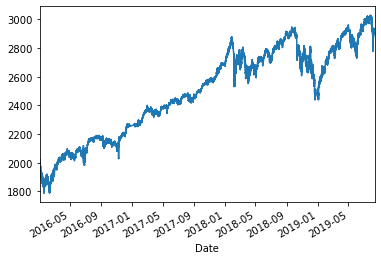

In [ ]:
sns.pairplot()

In [16]:
price_list = []
for i in range(-5,20):
    price_list.append('price_{}'.format(i))

price_list.append('text')
df_pch = df_toplot[price_list]

In [ ]:
#'Crooked Hillary will NEVER be able to handle the complexities and danger of ISIS - \
#it will just go on forever. We need change!',

In [20]:
df_pch.index = df_pch.text
df_pch.drop(columns='text', inplace=True)

In [44]:
df_pch.describe().sort_values('std', axis=1, ascending=False)

,price_9,price_3,price_19,price_2,price_1,price_6,price_18,price_5,price_13,price_16,...,price_7,price_0,price_15,price_-3,price_-2,price_-1,price_-4,price_12,price_17,price_-5
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,-0.014768,-0.004547,-0.006132,-0.008414,-0.000443,-0.003355,-0.013282,0.005651,-0.003738,0.003219,...,0.003721,-0.002385,-0.003022,-0.001013,-0.000795,-0.002455,-0.000992,-0.001404,-0.002637,0.001331
std,0.063030,0.054460,0.051925,0.049607,0.045786,0.045743,0.044245,0.040598,0.038705,0.038543,...,0.030951,0.030922,0.028980,0.027360,0.026988,0.024550,0.024394,0.023831,0.023729,0.023381
min,-0.302480,-0.299925,-0.216275,-0.116492,-0.182724,-0.075237,-0.168124,-0.107749,-0.142582,-0.105652,...,-0.122364,-0.094065,-0.104996,-0.087390,-0.080637,-0.087390,-0.062233,-0.083503,-0.099135,-0.052434
25%,-0.018616,-0.017638,-0.017347,-0.026492,-0.018201,-0.026161,-0.018021,-0.008847,-0.008888,-0.009184,...,-0.008862,-0.015293,-0.008856,-0.009178,-0.009094,-0.008900,-0.009018,-0.009115,-0.009192,-0.009198
50%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.004213,-0.004160,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.009028,0.009037,0.014779,0.008727,0.017900,0.014681,0.008896,0.027079,0.017832,0.018245,...,0.019892,0.009258,0.008864,0.009370,0.009164,0.008825,0.009209,0.008822,0.009117,0.009123
max,0.077969,0.112886,0.091912,0.133310,0.104257,0.160328,0.083573,0.104040,0.063114,0.131926,...,0.062967,0.091853,0.086520,0.089150,0.064320,0.052489,0.053088,0.051939,0.044476,0.074246


In [47]:
df_full[price_list].describe().sort_values('std', axis=1, ascending=False)

,price_2,price_18,price_12,price_4,price_7,price_9,price_8,price_11,price_5,price_3,...,price_17,price_14,price_-2,price_-5,price_0,price_19,price_13,price_-1,price_-3,price_10
count,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,...,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000,7571.000000
mean,-0.000587,0.000040,-0.000946,0.000141,-0.000138,0.000057,-0.000595,-0.000783,0.000164,-0.000514,...,-0.000251,0.000097,-0.000169,0.000054,0.000348,-0.000444,-0.000003,0.000137,-0.000176,-0.000355
std,0.028050,0.027948,0.027488,0.027177,0.027102,0.027055,0.026868,0.026865,0.026773,0.026452,...,0.026258,0.026188,0.026074,0.026024,0.025769,0.025721,0.025703,0.025168,0.024933,0.024809
min,-0.529311,-0.414118,-0.320085,-0.281841,-0.298710,-0.302480,-0.444979,-0.678048,-0.215108,-0.299925,...,-0.678048,-0.444979,-0.356774,-0.297619,-0.222890,-0.243991,-0.275879,-0.289747,-0.234321,-0.250046
25%,-0.010230,-0.010031,-0.010557,-0.009982,-0.010138,-0.010158,-0.010124,-0.010213,-0.010019,-0.010144,...,-0.010143,-0.010105,-0.009993,-0.010058,-0.009982,-0.010474,-0.010005,-0.010023,-0.010265,-0.010286
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.009794,0.010027,0.009745,0.010232,0.010271,0.010138,0.010036,0.010011,0.010138,0.010007,...,0.010014,0.010158,0.010106,0.010218,0.010159,0.010003,0.009965,0.010232,0.010099,0.009994
max,0.365631,0.597342,0.597342,0.323265,0.366002,0.226800,0.376552,0.280084,0.338685,0.452368,...,0.247706,0.376552,0.349386,0.264587,0.333912,0.232019,0.205915,0.266121,0.255548,0.220062


In [562]:
concat_1 = df_full_corr[df_full_corr.pct_sig_ch_high_low.abs()==1].sample(3)

In [564]:
concat_2 = df_full_corr.sample(3)

In [579]:
plot = pd.concat([concat_1, concat_2])

In [581]:
plot.columns

Index(['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0', 'volume_1', 'volume_2', 'volume_3', 'volume_4', 'volume_5',
       'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close'],
      dtype='object')

In [572]:
concat_2

,index,favorite_count,text,in_reply_to_screen_name,is_retweet,retweet_count,id_str,Symbol,VOL,Open,...,volume_13,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20,pct_sig_ch_high_low,pct_sig_ch_open_close
2016-05-31 10:48:00+00:00,8702,12948,So many great things happening - new poll numb...,NaN,False,3448,737596690257969152,@ES#,182,2088.75,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,0,0
2017-06-23 10:07:00+00:00,11439,44128,Will be on @foxandfriends. Enjoy!,NaN,False,5692,878192867847675904,@ES#,11,2433.75,...,-86.173264,-86.173264,-86.173264,-86.173264,-86.173264,-86.173264,-86.173264,-86.173264,0,0
2016-06-07 23:52:00+00:00,2118,7961,I will be interviewed tonight on @seanhannity ...,NaN,False,2239,740330660372619265,@ES#,190,2100.75,...,-98.170732,-98.170732,-98.170732,-98.170732,-98.170732,-98.170732,-98.170732,-98.170732,0,0


In [22]:
df_pch.shape

(46, 25)

In [ ]:
# Copy this photo and add specific 'trade' tweet images

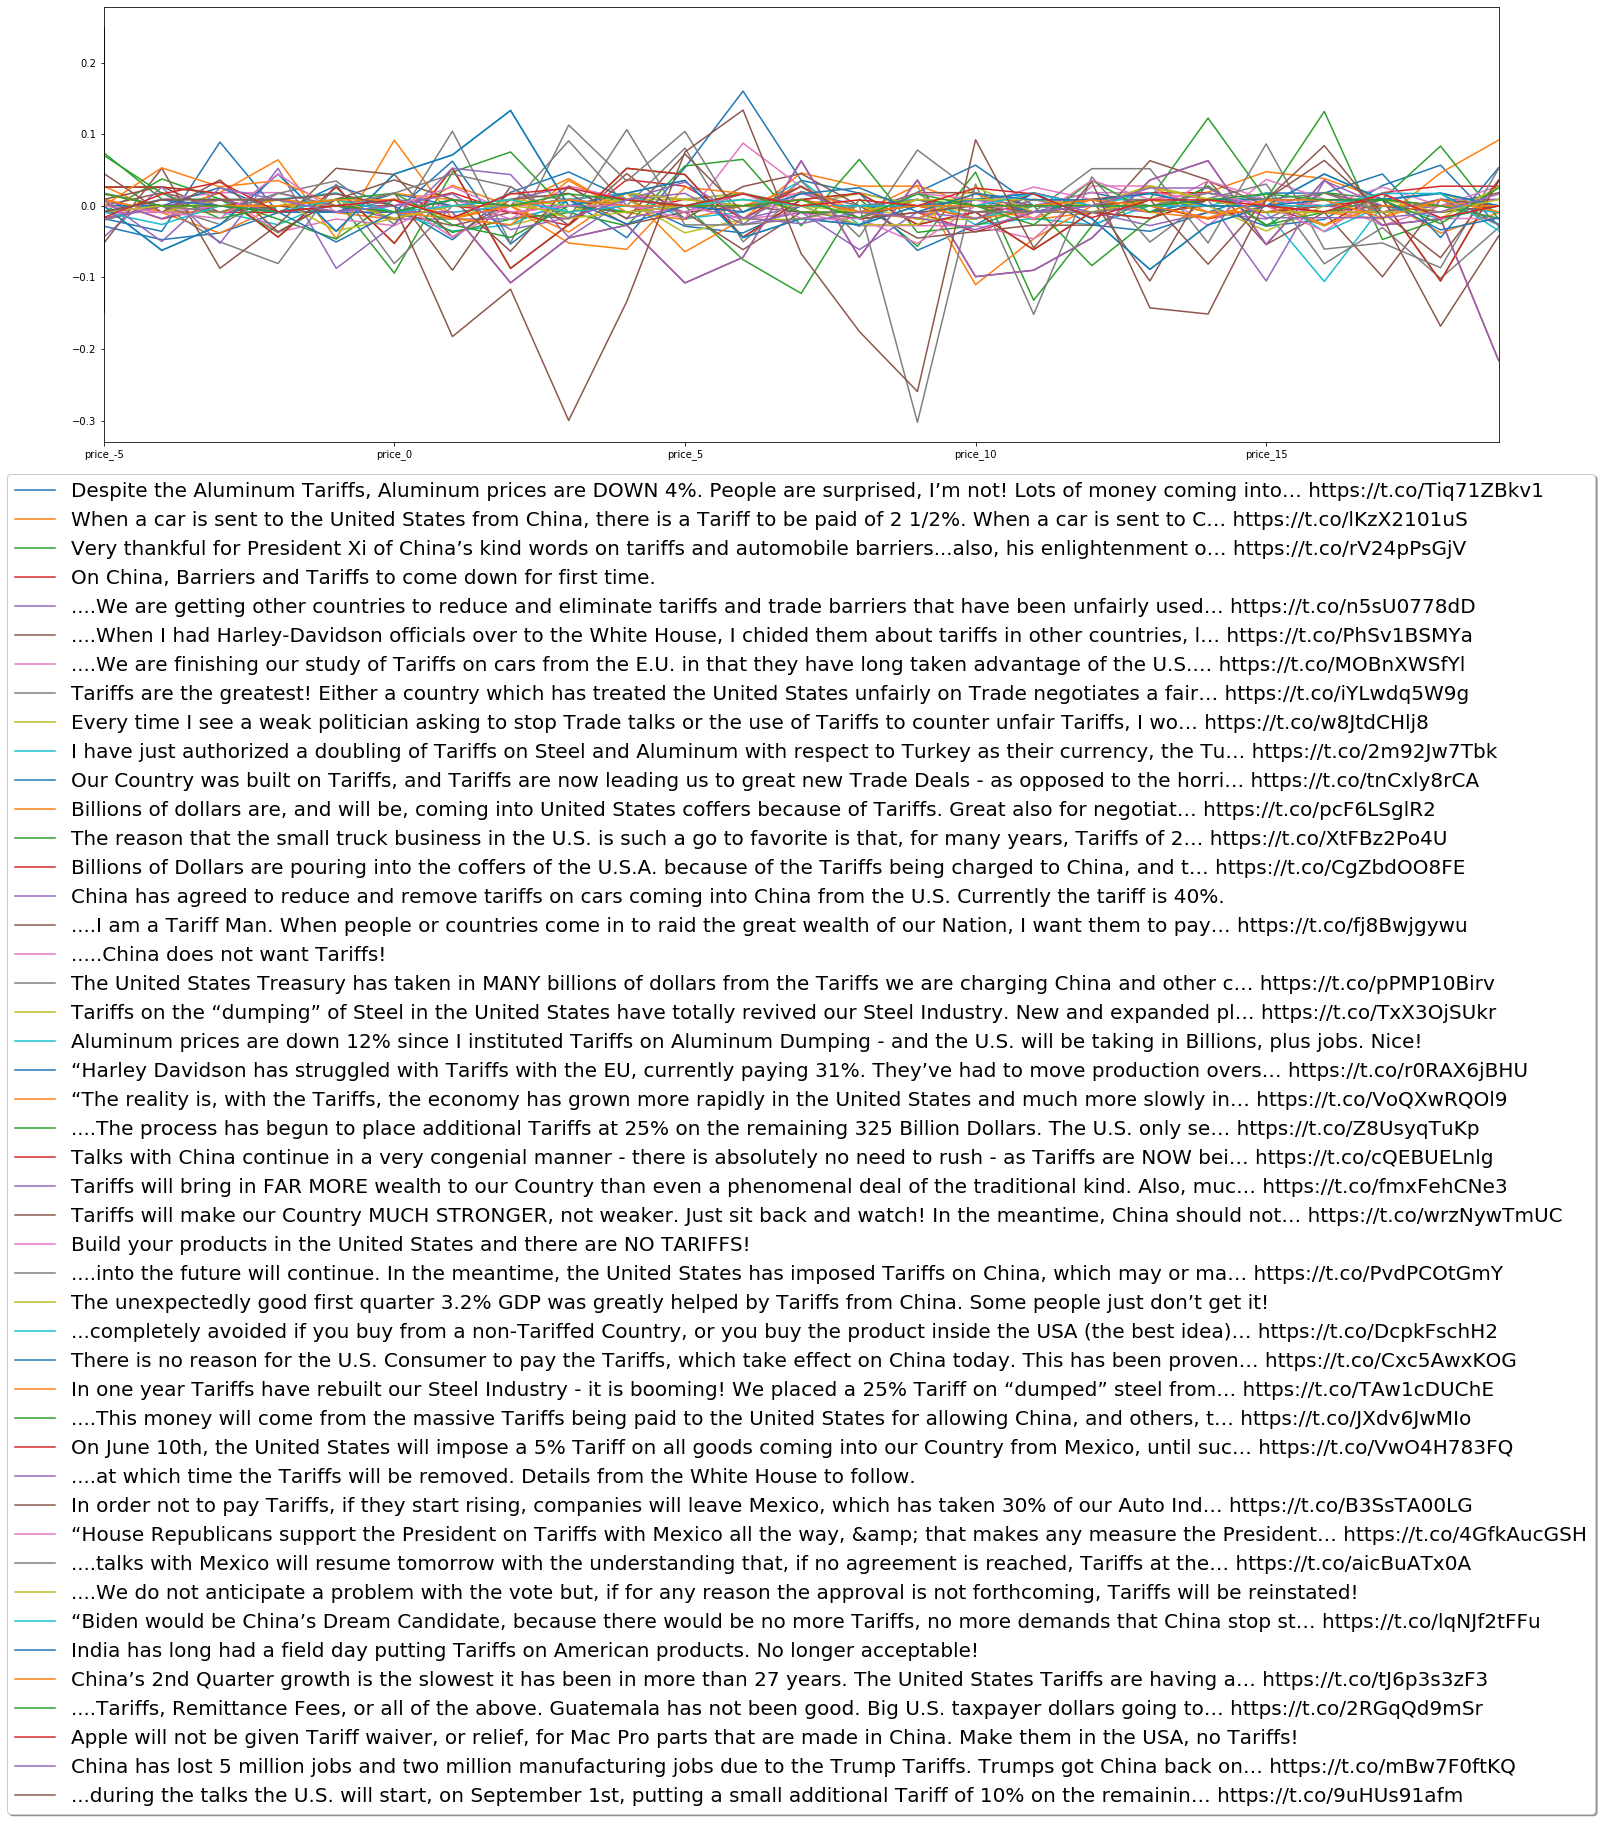

In [23]:
df_pch.T.plot(legend=True, figsize=(25, 8))
plt.legend(loc=(1,0))
plt.legend(loc='upper center', bbox_to_anchor = (0.5,-0.05),
fancybox=True, shadow=True, fontsize=20)
plt.vlines(x='price_0', ymin=-0.15, ymax=0.25)
plt.show()

In [102]:
df_toplot.index

Index(['HILLARY'S HEALTH CARE POLICIES\n#DrainTheSwamp #Debate https://t.co/t1Sr8dk2Xi',
       '"@by @tedcruz good I want to see the court decide what I was always told "natural born" means - born on American soil"',
       'I like New York Fed President John Williams first statement much better than his second. His first statement is 100… https://t.co/zR7KIy2Z6r',
       '....Many of the top FBI brass were fired, forced to leave, or left. McCabe’s wife received BIG DOLLARS from Clinton… https://t.co/4InFRTx4IC',
       '"@Davejager1: @creta_r 9 pm channel 70 CNN I will be watching Trump tonight. Want to have a person in the White House that takes no BS."',
       'Crooked Hillary will NEVER be able to handle the complexities and danger of ISIS - it will just go on forever. We need change!',
       'After allowing North Korea to research and build Nukes while Secretary of State (Bill C also), Crooked Hillary now criticizes.',
       'Great success today at NATO! Billions of additional

In [ ]:
# Creation of dependant variable HIGH_LOW BINARY

In [27]:
df_full_corr.columns

Index(['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0', 'volume_1', 'volume_2', 'volume_3', 'volume_4', 'volume_5',
       'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20'],
      dtype='object')

In [28]:
volume_list = []
for i in range(0,21):
    volume_list.append('volume_{}'.format(i))

In [37]:
price_list = []
high_low_list = []
for i in range(0,6):
    price_list.append('price_{}'.format(i))
    high_low_list.append('min_price{}'.format(i))
    high_low_list.append('max_price{}'.format(i))

In [43]:
high_low_list[11]

'max_price5'

In [44]:
def make_binary_high_low(df):
    data_list = []
    for i in range(0, df.shape[0]):
        if round(df.iloc[i].min(),11) <=-0.10:
#             print(df.iloc[i].max())
            data_list.append(-1)
        elif round(df.iloc[i].max(),11) >=0.10:
#             print(df.iloc[i].min())
            data_list.append(1)
        else:
            data_list.append(0)
#             print(df.iloc[i].max())
    return data_list

In [40]:
df_high_low_trial = df_full_corr[high_low_list]

In [72]:
df_full_corr['pct_sig_ch_high_low'] = make_binary_high_low(df_high_low_trial)

In [73]:
df_full_corr.pct_sig_ch_high_low.value_counts()

 0    7045
-1     346
 1     180
Name: pct_sig_ch_high_low, dtype: int64

In [53]:
# Create Binary From Just Price Differences #

In [54]:
def make_binary_price(df):
    data_list = []
    for i in range(0, df.shape[0]):
        if round(df.iloc[i].min(),6) <=-0.10:
#             print(df.iloc[i].max())
            data_list.append(-1)
        elif round(df.iloc[i].max(),6) >=0.10:
#             print(df.iloc[i].min())
            data_list.append(1)
        else:
            data_list.append(0)
#             print(df.iloc[i].max())
    return data_list

In [55]:
df_price_diff = df_full_corr[price_list]

In [74]:
df_full_corr['pct_sig_ch_open_close'] = make_binary_price(df_price_diff)

In [75]:
df_full_corr.pct_sig_ch_open_close.value_counts()

 0    7240
-1     186
 1     145
Name: pct_sig_ch_open_close, dtype: int64

In [268]:
def correlation_heat_map(df):
    corrs = df.corr()
    corrs = df.corr()[(df.corr() < 1.0) & (df.corr() > 0.1) | (df.corr() < -0.1)].dropna(how='all')
    fig, ax = plt.subplots(figsize=(20, 9))
    ax = sns.heatmap(corrs, annot=True, cmap='coolwarm')
    

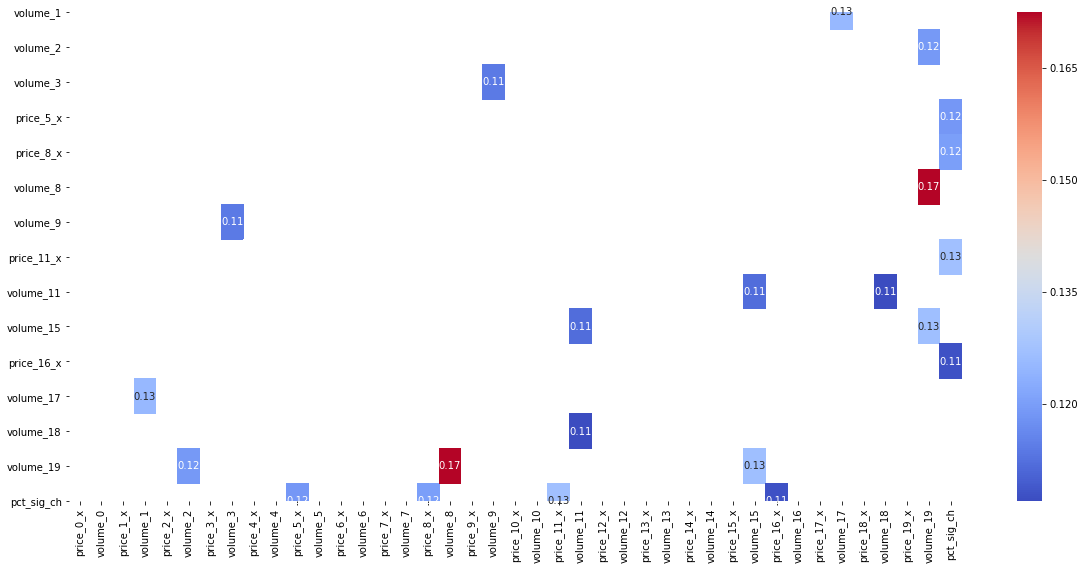

In [269]:
correlation_heat_map(df_test_final)

In [58]:
df_full_corr.columns

Index(['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0', 'volume_1', 'volume_2', 'volume_3', 'volume_4', 'volume_5',
       'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close'],
      dtype='object')

In [62]:
df_full_corr[df_full_corr.text.str.contains(r'tariff',flags=re.IGNORECASE, regex=True)]['pct_sig_ch_high_low'].value_counts()

 0    34
-1     7
 1     5
Name: pct_sig_ch_high_low, dtype: int64

In [63]:
df_full_corr[df_full_corr.text.str.contains(r'tariff',flags=re.IGNORECASE, regex=True)]['pct_sig_ch_open_close'].value_counts()

 0    39
 1     4
-1     3
Name: pct_sig_ch_open_close, dtype: int64

In [ ]:
## Re-Run Regression with binary classifier: significant vs. non-significant ##

In [ ]:
# Create a test as index becomes comprimised

In [76]:
df_full = df_full_corr.copy()

In [77]:
mean_daily_volumes = snp['VOL'].groupby(by=[snp.index.date]).mean()
mean_daily_volumes

2016-01-03     184.118644
2016-01-04    1617.917216
2016-01-05    1231.704545
2016-01-06    1622.542125
2016-01-07    2170.193407
                 ...     
2019-08-07    1894.534066
2019-08-08    1295.503297
2019-08-09    1467.986983
2019-08-11     145.762712
2019-08-12     311.424077
Name: VOL, Length: 1090, dtype: float64

In [78]:
df_full['date'] = df_full_corr.index.date

In [79]:
df_full = pd.merge(df_full_corr, mean_daily_volumes, left_on=df_full['date'], right_on=mean_daily_volumes.index, how='left')

In [80]:
df_full.head(1)

,key_0,index,favorite_count,text,in_reply_to_screen_name,is_retweet,retweet_count,id_str,Symbol,VOL_x,...,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20,pct_sig_ch_high_low,pct_sig_ch_open_close,VOL_y
0,2016-01-03,10492,8080,The worst thing Hillary could do is have her h...,NaN,False,2932,683789635189882881,@ES#,146,...,227.777778,227.777778,227.777778,227.777778,227.777778,227.777778,227.777778,0,0,184.118644


In [81]:
df_full.index = df_full_corr.index

In [87]:
df_full.drop(columns=['key_0'], inplace=True)

KeyError: "['key_0'] not found in axis"

In [ ]:
## Creating Mean hourly Volumes for that specific hour

In [88]:
hourly_mean_volumes = snp['volume_0'].groupby(by=[snp.index.date,snp.index.hour]).mean()

In [89]:
df_full['date_hour'] = list(zip(df_test.index.date, df_test.index.hour))

In [90]:
df_test_2 = pd.merge(df_full, hourly_mean_volumes, left_on=df_full['date_hour'], right_on=hourly_mean_volumes.index, how='left')

In [91]:
df_test_2.index = df_full.index

In [94]:
df_test_2.columns

Index(['key_0', 'index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL_x', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0_x', 'volume_1', 'volume_2', 'volume_3', 'volume_4',
       'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close', 'VOL_y', 'date_hour',
       'volume_0_y'],
      dtype='object')

In [95]:
df_test_2.drop(columns=['key_0', 'date_hour'], inplace=True)

In [472]:
#Creating mean hourly volumes across entire dataset

In [96]:
hourly_mean_volumes_total = df_test_2['volume_0_x'].groupby(by=[df_full.index.hour]).mean()

In [97]:
df_test_2['hour'] = df_test_2.index.hour

In [98]:
df_test_2 = pd.merge(df_test_2, hourly_mean_volumes_total, left_on=df_test_2['hour'], right_on=hourly_mean_volumes_total.index, how='left')

In [99]:
df_test_2.drop(columns=['key_0', 'hour'], inplace=True)

In [101]:
df_test_2.index= df_full_corr.index

In [102]:
df_test_2.columns

Index(['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL_x', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0_x_x', 'volume_1', 'volume_2', 'volume_3', 'volume_4',
       'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close', 'VOL_y', 'volume_0_y',
       'volume_0_x_y'],
      dtype='object')

In [103]:
df_test_2.columns = ['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL_x', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0_x_x', 'volume_1', 'volume_2', 'volume_3', 'volume_4',
       'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close', 'mean_daily daily_volume',
        'hourly_mean_volume_specific', 'hourly_mean_volume_general']

In [ ]:
#Creating sustained volume

In [329]:
# Creating hourly graphs for price, tweet volume and sentiment #

In [379]:
df_full_hour_analysis = df_test_2[['volume_-5', 'volume_-4', 'volume_-3',\
       'volume_-2', 'volume_-1', 'Volume', 'volume_1', 'volume_2', 'volume_3',\
       'volume_4', 'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9',\
       'volume_10', 'volume_11', 'volume_12', 'volume_13', 'volume_14',\
       'volume_15', 'volume_16', 'volume_17', 'volume_18', 'volume_19',\
       'volume_20']].groupby(by=[df_full.index.hour]).mean()

In [556]:
df_full_hour_analysis

,volume_-5,volume_-4,volume_-3,volume_-2,volume_-1,Volume,volume_1,volume_2,volume_3,volume_4,...,volume_11,volume_12,volume_13,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20
0,168.153005,169.439891,172.065574,160.775956,162.584699,164.021858,179.464481,170.467213,153.161202,146.459016,...,191.207650,190.677596,197.150273,180.500000,177.215847,163.428962,177.139344,190.680328,171.978142,170.866120
1,181.837772,181.167070,185.907990,181.380145,181.181598,167.891041,182.343826,193.615012,190.692494,189.411622,...,202.595642,177.077482,182.014528,180.789346,173.225182,175.370460,158.786925,164.641646,175.104116,163.111380
2,143.603774,128.601415,130.132075,121.820755,114.948113,114.818396,120.014151,115.792453,124.066038,116.391509,...,143.643868,122.834906,137.139151,121.443396,130.240566,120.028302,126.893868,115.872642,126.459906,126.745283
3,170.717608,144.348837,147.438538,175.767442,149.863787,149.242525,140.235880,148.996678,151.737542,145.900332,...,129.083056,119.611296,129.697674,125.176080,119.990033,125.179402,130.046512,119.029900,105.784053,98.099668
4,89.751773,93.397163,86.943262,75.248227,91.815603,99.290780,93.170213,88.503546,86.546099,99.858156,...,84.992908,102.425532,98.680851,87.205674,77.148936,91.609929,89.801418,91.709220,85.787234,90.375887
5,150.194030,129.089552,125.552239,135.686567,122.940299,107.880597,118.149254,123.507463,126.940299,118.716418,...,153.835821,113.328358,126.656716,145.253731,114.985075,144.582090,200.402985,224.865672,180.447761,167.552239
6,117.181818,136.666667,144.151515,130.060606,142.090909,154.909091,163.090909,143.878788,137.757576,135.000000,...,139.575758,236.606061,181.090909,140.151515,171.666667,149.424242,175.363636,168.727273,188.333333,149.090909
7,277.782609,335.347826,342.347826,354.260870,340.826087,446.739130,504.652174,497.260870,339.608696,467.695652,...,420.347826,409.652174,415.000000,375.043478,394.913043,479.391304,414.913043,439.217391,392.478261,447.434783
8,319.625000,395.250000,388.937500,324.875000,322.562500,593.750000,340.375000,450.812500,376.562500,374.000000,...,241.062500,299.312500,263.062500,325.250000,359.937500,369.687500,246.687500,335.562500,439.937500,413.750000
9,310.611111,306.722222,312.703704,286.870370,378.166667,303.351852,300.648148,290.222222,311.648148,301.592593,...,352.870370,592.481481,314.296296,320.240741,222.037037,346.944444,395.981481,392.203704,296.888889,295.962963


In [ ]:
# Create 'hour' binary variable

In [107]:
df_test_2['hour'] = df_test_2.index.hour

In [108]:
df_test_2 = pd.get_dummies(df_test_2, columns=['hour'], drop_first=True)

In [109]:
df_test_2.columns

Index(['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL_x', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0_x_x', 'volume_1', 'volume_2', 'volume_3', 'volume_4',
       'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close',
       'mean_daily daily_volume', 'hourly_mean_volume_specific',
       'hourly_mean_volume_general', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 

In [379]:
df_test_2.shape

(7571, 71)

In [ ]:
# still need to add sustained volume and vader compound #

In [380]:
df_test_2.to_csv('sp500_trump_update')

In [466]:
df_test_2.groupby(by=[df_test_2.index.date]).describe()['index']['count'].plot();

KeyboardInterrupt: 

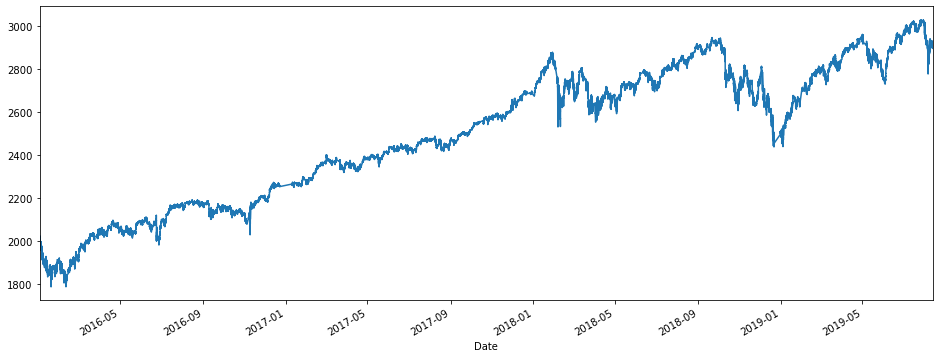

In [506]:
snp['Open'].plot(figsize=(16,6))
plt.savefig('sp500.png');

In [104]:
# Create timeframe graph for s&p500, sig-impact, tw volume and sentiment score #

In [519]:
df_test_hour = df_test_2.groupby(by=\
                    [df_test_2.index.year, df_test_2.index.hour]).describe()

In [522]:
df_test_hour.Sentim

,count,mean,std,min,25%,50%,75%,max
0,366.0,1.0,4.214257,-0.627884,-0.341945,0.000000,0.659571,47.050057
1,413.0,1.0,3.922567,-0.659231,-0.289415,0.096980,0.750716,42.626350
2,424.0,1.0,3.557210,-0.603021,-0.327892,0.059379,0.893391,38.149916
3,301.0,1.0,3.574920,-0.524759,-0.307134,0.118237,0.770992,36.135158
4,141.0,1.0,4.300553,-0.361441,-0.187671,0.050972,0.685408,45.041069
5,67.0,1.0,4.176964,-0.461331,-0.198041,-0.027474,0.295011,31.372029
6,33.0,1.0,2.859491,-0.976762,-0.385517,0.000000,0.837780,12.629533
7,23.0,1.0,3.195968,-0.256328,-0.128040,0.101045,0.414251,14.671678
8,16.0,1.0,2.777203,-1.300713,-0.932347,0.111648,1.736203,8.810161
9,54.0,1.0,3.004549,-0.604454,-0.258141,-0.082598,0.408045,14.457880


In [509]:
df_test_analysis['Open'][['count']].to_csv('plot.csv')
            

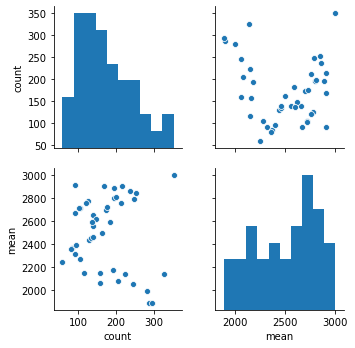

In [501]:
sns.pairplot(df_test_analysis['Open'][['count', 'mean']]);

In [ ]:
df_test_analysis = df_test_2.groupby(by=\
                    [df_test_2.index.year, df_test_2.index.month]).describe()

In [385]:
df_test_analysis['pct_sig_ch'].sort_values('std', ascending=False)

## Month in the year ##

count      mean       std  min  25%  50%  75%  max
2016 1   286.0 -0.241259  0.627871 -1.0 -1.0  0.0  0.0  1.0
2018 10  248.0 -0.112903  0.527920 -1.0  0.0  0.0  0.0  1.0
     12  148.0 -0.141892  0.521773 -1.0  0.0  0.0  0.0  1.0
2019 8    91.0 -0.120879  0.512839 -1.0  0.0  0.0  0.0  1.0
2018 2   105.0 -0.161905  0.502375 -1.0  0.0  0.0  0.0  1.0

In [388]:
df_day_analysis = df_test_2.groupby(by=\
                    [df_test_2.index.weekday]).describe()
df_day_analysis['pct_sig_ch'].sort_values('std', ascending=False)

## Weekday ##

,count,mean,std,min,25%,50%,75%,max
3,1569.0,-0.056087,0.341687,-1.0,0.0,0.0,0.0,1.0
4,1381.0,-0.031137,0.327110,-1.0,0.0,0.0,0.0,1.0
1,1546.0,-0.026520,0.278592,-1.0,0.0,0.0,0.0,1.0
2,1680.0,-0.027381,0.268164,-1.0,0.0,0.0,0.0,1.0
0,1304.0,-0.020706,0.254568,-1.0,0.0,0.0,0.0,1.0
6,91.0,-0.043956,0.254388,-1.0,0.0,0.0,0.0,1.0


In [558]:
df_test_analysis['sustained_vol'].sort_values('std', ascending=False)

## Supports the hypothesis that perhaps people have become imune to Trump's tweets ##

count      mean        std       min       25%       50%       75%  \
2016 12   59.0  4.043703  16.743991 -3.263585 -0.432554  0.008184  1.737599   
2017 10  139.0  3.739586  13.340277 -2.745979 -0.244838  0.202619  2.342662   
     11  183.0  2.554418  12.298182 -3.290661 -0.334459  0.216879  1.725440   
2019 7   351.0  1.485045  10.329748 -2.926131 -0.354569  0.167181  0.901735   
2017 2    92.0  1.372887   6.697592 -3.334727 -0.554359 -0.092958  0.707251   
     5    96.0  2.389019   6.507829 -2.969106 -0.293269  0.193141  1.941744   
     1   104.0  2.053117   6.176824 -2.390290 -0.536168  0.229452  2.127172   
     7   134.0  1.726045   5.605909 -3.770339 -0.461995  0.074835  1.631610   
     8   139.0  1.886458   5.600215 -3.329166 -0.366240  0.196443  1.421293   
     4    81.0  1.614748   5.375858 -2.034607 -0.460533  0.000000  1.462215   
2016 8   193.0  1.532802   4.840251 -3.284931 -0.529765  0.000000  1.560180   
2017 12   91.0  0.780356   4.510633 -4.016280 -0.760733 -0.199224  0.864974   
2018 1   126.0  1.218897   4.330531 -4.297368 -0.484540  0.128386  1.449091   
2016 10  326.0  1.285313   4.259415 -3.156566 -0.349573  0.122522  1.111005   
2018 8   236.0  1.069383   4.184667 -3.604364 -0.480309  0.066231  1.224171   
     9   169.0  0.977604   4.166575 -4.170215 -0.464617 -0.060187  0.859805   
2016 9   157.0  1.119521   3.716582 -4.269770 -0.330568  0.120946  0.930837   
2019 4   215.0  1.061155   3.637444 -3.655788 -0.468497  0.148334  1.336550   
2017 6   129.0  0.802345   3.505847 -3.694462 -0.505933 -0.174756  0.764170   
2016 6   205.0  0.910532   3.491074 -3.749201 -0.524759 -0.074294  1.197670   
     7   223.0  0.884796   3.079660 -3.388208 -0.430695  0.004269  1.198133   
     3   280.0  0.969539   3.001159 -3.338539 -0.388695  0.063051  1.213761   
2017 9   163.0  1.037401   2.949926 -4.241535 -0.472044 -0.038945  1.626262   
     3    84.0  1.040105   2.657642 -2.010792 -0.371408  0.052074  1.327834   
2016 11  117.0  0.923916   2.549545 -2.298760 -0.247097  0.078306  1.143319   
2018 3   103.0  0.821584   2.490308 -2.245045 -0.359214  0.161224  1.167555   
2019 2   122.0  0.847275   2.380972 -2.371800 -0.344609  0.247662  1.008658   
2016 4   159.0  0.661727   2.339907 -3.708330 -0.428118  0.097670  0.953006   
2018 6   213.0  0.729217   2.252001 -3.920814 -0.393622  0.021719  1.077558   
2016 5   245.0  0.471975   2.169886 -3.495742 -0.460170 -0.027474  0.730184   
2019 3   199.0  0.724345   2.115840 -3.205092 -0.326337  0.252804  1.123178   
     1   136.0  0.529223   1.965640 -3.143706 -0.418940  0.113455  0.987269   
2016 2   294.0  0.564279   1.929126 -2.767218 -0.397836  0.102871  1.026312   
2018 12  148.0  0.401773   1.881426 -2.225374 -0.453471 -0.010246  0.684636   
     4   139.0  0.437530   1.732019 -3.671027 -0.374020  0.019789  0.790564   
     5   173.0  0.490345   1.724967 -3.567119 -0.315150  0.112526  0.932293   
     10  248.0  0.426052   1.701502 -2.374152 -0.387349  0.051186  0.879889   
     7   195.0  0.596240   1.700852 -2.248515 -0.231396  0.070408  0.951742   
     2   105.0  0.535961   1.591109 -2.417248 -0.302288  0.240168  1.134789   
2019 6   195.0  0.381931   1.583059 -3.775388 -0.320420  0.056584  0.682620   
     5   253.0  0.342938   1.555258 -2.513457 -0.290292 -0.064463  0.475219   
2018 11  175.0  0.397487   1.380912 -2.724713 -0.418899  0.106629  0.907961   
2019 8    91.0  0.288374   1.243527 -3.185128 -0.202901  0.000569  0.582848   
2016 1   286.0  0.207882   1.206666 -3.082538 -0.369937 -0.012800  0.642568   

                max  
2016 12  117.475570  
2017 10  126.713647  
     11  154.741983  
2019 7   131.345788  
2017 2    45.381309  
     5    47.967314  
     1    48.898856  
     7    47.050057  
     8    34.167654  
     4    38.149916  
2016 8    39.535246  
2017 12   34.623059  
2018 1    32.970034  
2016 10   40.284550  
2018 8    45.041069  
     9    44.293851  
2016 9    30.757837  
2019 4    28.515186  
2017 6    20.977934  
2016 6    36.

In [ ]:
# TAKE THIS DATASET AND RUN A NEW MODEL #

In [ ]:
# DO A CVEC OF THOSE TWEETS THAT HAVE MOVED SUFFICIENTLY, ALSO LOOK AT TIME #

In [ ]:
# EXTRACT 'TRADE' RELATED WORDS FROM THAT AND DUMMIFY #

In [ ]:
# SEE IF ANY IMPROVEMENT, THEN START CREATING GRAPHS FOR PRESENTATION #

In [ ]:
# Plot the distribution of sentiment #

In [334]:

for i in range(1,20):
    rearranged_columns.append('volume_{}_x'.format(i))
    
    

In [337]:
rearranged_columns.append(['text', 'in_reply_to_screen_name','price_0_x','volume_0_x_x','pct_sig_ch',\
       'mean_daily_volumes', 'mean_specific_hourly_volume',\
       'mean_hourly_total_volume'])

In [350]:
rearranged_columns = ['price_0_x','price_1_x',
 'price_2_x',
 'price_3_x',
 'price_4_x',
 'price_5_x',
 'price_6_x',
 'price_7_x',
 'price_8_x',
 'price_9_x',
 'price_10_x',
 'price_11_x',
 'price_12_x',
 'price_13_x',
 'price_14_x',
 'price_15_x',
 'price_16_x',
 'price_17_x',
 'price_18_x',
 'price_19_x',
 'volume_0_x_x',                     
 'volume_1',
 'volume_2',
 'volume_3',
 'volume_4',
 'volume_5',
 'volume_6',
 'volume_7',
 'volume_8',
 'volume_9',
 'volume_10',
 'volume_11',
 'volume_12',
 'volume_13',
 'volume_14',
 'volume_15',
 'volume_16',
 'volume_17',
 'volume_18',
 'volume_19',
 'text',
  'in_reply_to_screen_name',
  'pct_sig_ch',
  'mean_daily_volumes',
  'mean_specific_hourly_volume',
  'mean_hourly_total_volume']

In [ ]:
'text', 'in_reply_to_screen_name','price_0_x','volume_0_x_x','pct_sig_ch',\
       'mean_daily_volumes', 'mean_specific_hourly_volume',\
       'mean_hourly_total_volume']])

In [344]:
df_test_2

,text,in_reply_to_screen_name,price_0_x,volume_0_x_x,price_1_x,volume_1,price_2_x,volume_2,price_3_x,volume_3,...,price_17_x,volume_17,price_18_x,volume_18,price_19_x,volume_19,pct_sig_ch,mean_daily_volumes,mean_specific_hourly_volume,mean_hourly_total_volume
2016-01-03 23:18:00+00:00,The worst thing Hillary could do is have her h...,NaN,-0.012353,228.767123,-0.012353,69.767442,0.000000,-3.370787,0.000000,102.272727,...,0.000000,103.030303,-0.024719,175.000000,-0.012362,-60.000000,0,184.118644,56.301727,278.005722
2016-01-03 23:19:00+00:00,"By the way, Hillary &amp; the MSM forgot to me...",NaN,-0.012353,69.767442,0.000000,-3.370787,0.000000,102.272727,0.000000,-25.423729,...,-0.024719,175.000000,-0.012362,-60.000000,0.000000,-45.454545,0,184.118644,56.301727,278.005722
2016-01-04 00:26:00+00:00,"""@icareeguns: This #Iowan is voting for @RealD...",NaN,-0.012356,-73.737374,0.000000,-42.441860,0.012356,391.428571,0.000000,400.000000,...,0.000000,730.000000,0.012355,-86.111111,0.000000,-42.857143,0,1617.917216,79.820935,116.774474
2016-01-04 11:42:00+00:00,"""@RhettRiley1234: Trump only wins with our vot...",NaN,0.025253,69.354839,0.025246,-47.201946,0.000000,249.787234,0.025246,29.120879,...,0.000000,-35.193133,-0.088306,-73.966480,0.012625,-4.380342,0,1617.917216,26.468907,155.298009
2016-01-04 17:31:00+00:00,"I look forward to being in Lowell, Massachuset...",NaN,-0.038071,-20.220432,-0.050781,28.485839,-0.012702,-5.263158,0.050807,-11.466423,...,0.012669,202.138275,0.000000,11.614956,-0.012669,-53.427195,0,1617.917216,18.245865,35.965701
2016-01-04 20:00:00+00:00,"Woody Johnson, owner of the NYJets, is @JebBus...",NaN,0.038047,26.360084,-0.050710,-1.800472,-0.038047,6.440465,-0.063436,5.153617,...,-0.063492,71.376147,0.025410,12.661499,-0.025400,-9.916201,-1,1617.917216,8.200449,79.646974
2016-01-05 02:20:00+00:00,"The rally in Lowell, Massachusetts, was amazin...",NaN,-0.012531,183.720930,-0.012534,-79.326923,0.025069,316.000000,-0.012531,-13.793103,...,-0.012527,78.350515,0.025060,6.593407,-0.012528,133.333333,0,1231.704545,134.016781,130.896095
2016-01-05 02:22:00+00:00,"""@troyconway: Now 2-more IT Firms going over s...",NaN,0.025069,316.000000,-0.012531,-13.793103,-0.025066,-17.142857,0.000000,29.629630,...,-0.012528,133.333333,0.000000,39.285714,0.012528,-71.428571,0,1231.704545,134.016781,130.896095
2016-01-05 02:28:00+00:00,"""@thecybermenace: @realDonaldTrump Donald Trum...",NaN,0.025066,-22.222222,0.012528,-1.098901,0.012528,-30.000000,0.025053,14.035088,...,-0.025063,-92.903226,0.000000,330.555556,-0.012531,125.000000,0,1231.704545,134.016781,130.896095
2016-01-05 03:33:00+00:00,"""@samuelghaddad: Wow! Let's hear it for the Fa...",NaN,-0.012516,2325.000000,0.000000,-73.333333,0.025034,-91.428571,0.012514,483.333333,...,0.012516,-52.830189,-0.012516,-57.600000,0.000000,-71.330275,0,1231.704545,123.021072,168.009949


In [351]:
df_test_2 = df_test_2[rearranged_columns]

In [352]:
cols = list(df.columns.values)

In [121]:
df_test_2.columns

Index(['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL_x', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0_x_x', 'volume_1', 'volume_2', 'volume_3', 'volume_4',
       'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close',
       'mean_daily daily_volume', 'hourly_mean_volume_specific',
       'hourly_mean_volume_general', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 

In [297]:
df_test_2.iloc[:,:53].mean(axis=1)

2016-01-03 23:18:00+00:00     33.559992
2016-01-03 23:19:00+00:00     32.480921
2016-01-04 00:26:00+00:00    102.755776
2016-01-04 11:42:00+00:00     56.785397
2016-01-04 17:31:00+00:00     52.809112
                                ...    
2019-08-09 12:03:00+00:00     51.934844
2019-08-09 12:03:00+00:00     51.934844
2019-08-09 18:44:00+00:00     46.736046
2019-08-09 18:44:00+00:00     46.736046
2019-08-12 04:01:00+00:00     74.736763
Length: 7571, dtype: float64

In [118]:
df_test_2.columns[52]

'volume_20'

In [ ]:
## Have to change this ##

In [119]:
df_test_2['vol_20_avg'] = df_test_2.iloc[:,32:52].mean(axis=1)

In [122]:
df_test_2['sustained_vol'] = df_test_2['vol_20_avg']/df_test_2['hourly_mean_volume_general']

{'whiskers': [<matplotlib.lines.Line2D at 0x1197d5748>,
 'caps': [<matplotlib.lines.Line2D at 0x11b316e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b3165f8>],
 'medians': [<matplotlib.lines.Line2D at 0x11b425550>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b425898>],
 'means': []}

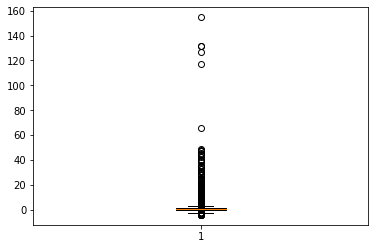

In [125]:
plt.boxplot(df_test_2['sustained_vol'])

In [ ]:
# Need to add sentiment scores etc.

In [126]:
df_test_2[['pct_sig_ch_open_close', 'pct_sig_ch_high_low','sustained_vol']].corr()

,pct_sig_ch_open_close,pct_sig_ch_high_low,sustained_vol
pct_sig_ch_open_close,1.000000,0.625733,0.000324
pct_sig_ch_high_low,0.625733,1.000000,0.006617
sustained_vol,0.000324,0.006617,1.000000


In [373]:
df_test_2.columns

Index(['price_0_x', 'price_1_x', 'price_2_x', 'price_3_x', 'price_4_x',
       'price_5_x', 'price_6_x', 'price_7_x', 'price_8_x', 'price_9_x',
       'price_10_x', 'price_11_x', 'price_12_x', 'price_13_x', 'price_14_x',
       'price_15_x', 'price_16_x', 'price_17_x', 'price_18_x', 'price_19_x',
       'volume_0_x_x', 'volume_1', 'volume_2', 'volume_3', 'volume_4',
       'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'text',
       'in_reply_to_screen_name', 'pct_sig_ch', 'mean_daily_volumes',
       'mean_specific_hourly_volume', 'mean_hourly_total_volume', 'vol_45_avg',
       'sustained_vol', 'hour'],
      dtype='object')

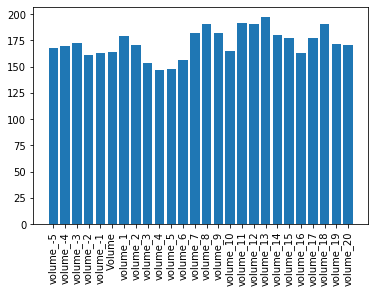

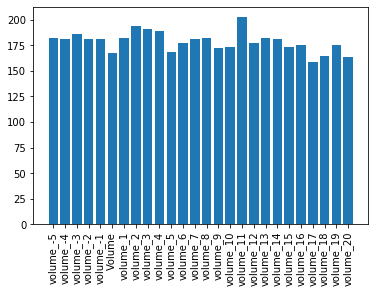

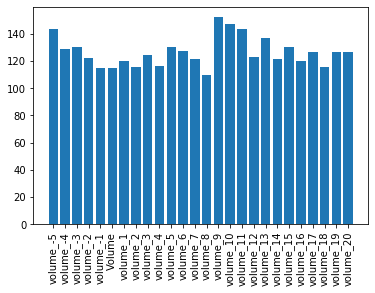

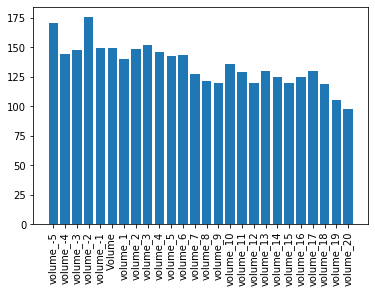

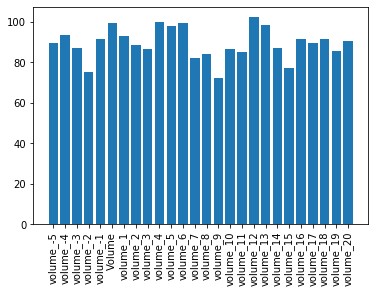

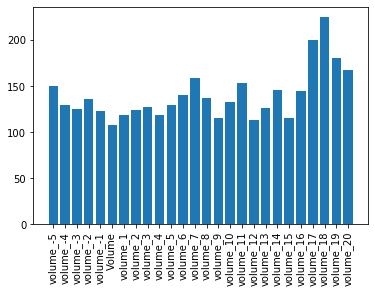

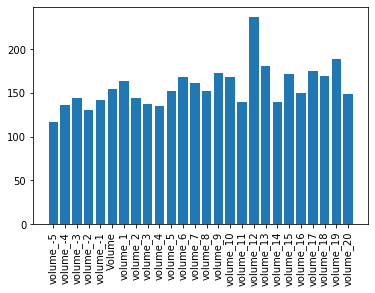

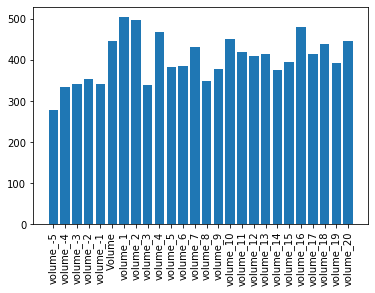

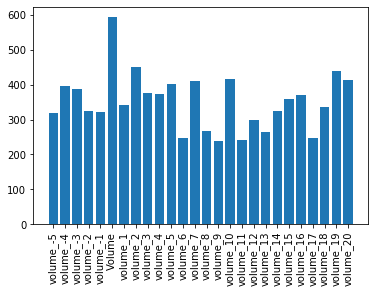

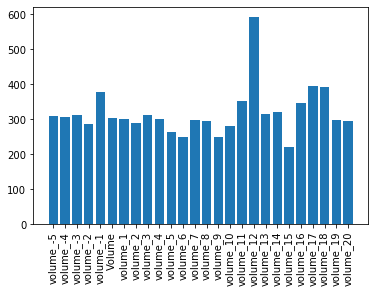

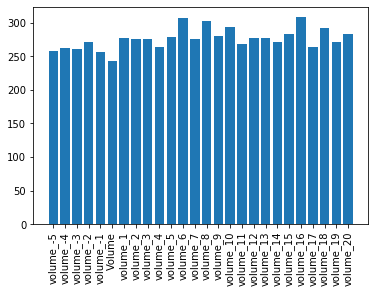

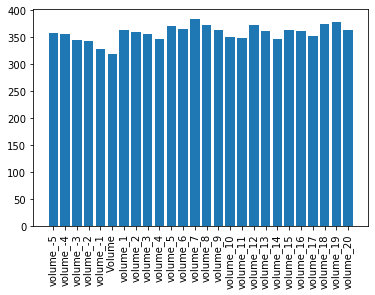

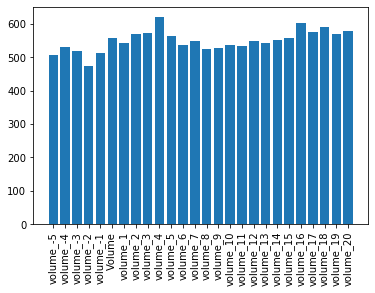

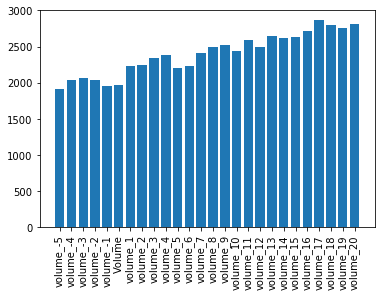

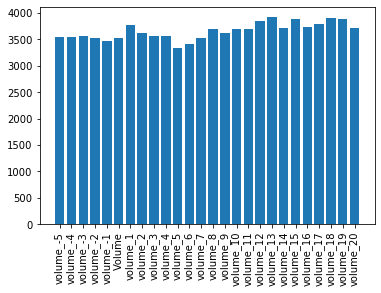

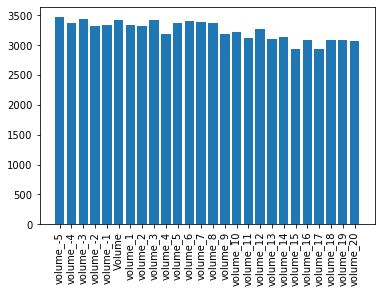

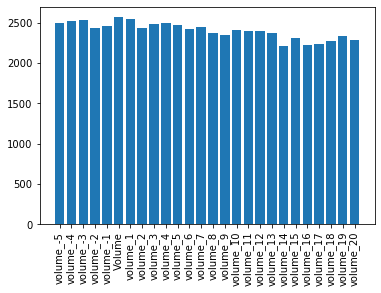

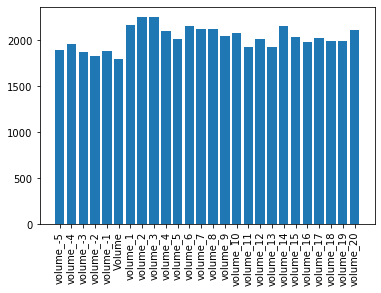

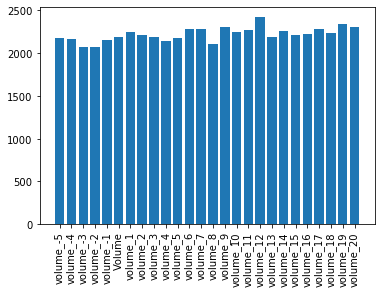

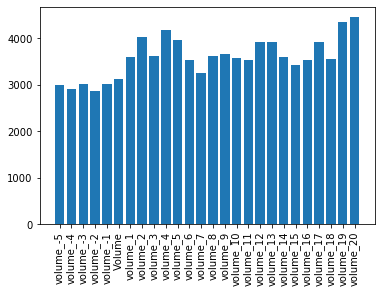

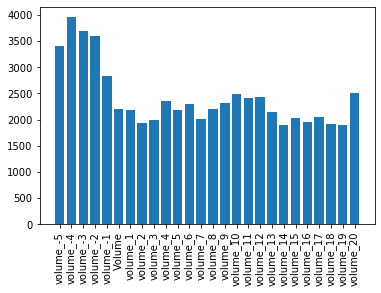

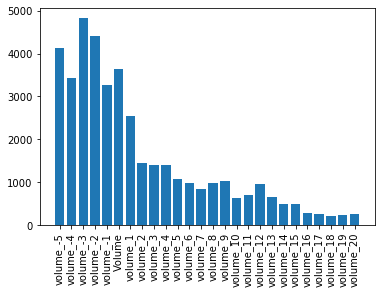

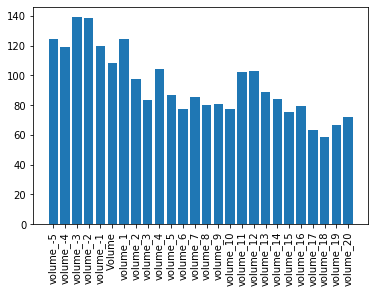

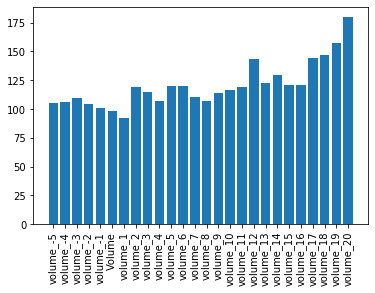

In [388]:
for i in range(0,24):
    plt.bar(df_full_hour_analysis.columns, df_full_hour_analysis.iloc[i])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
## VISUAL EDA

In [ ]:
# Question - what are we doing with n-grams? #

In [640]:
# NEED TO STEM

In [220]:
def process_text(documents, pos=False):
    nlp = textacy.load_spacy('en_core_web_sm')
    
    texts = []
    tokenised_texts = []

    if pos: # pos can either be False or a list of parts of speech
        for document in tqdm_notebook(nlp.pipe(documents, batch_size=200)):
            assert document.is_parsed
            tokens = [token
                      for token in document 
                      if token.is_stop == False
                      and token.pos_ in pos
                      and token.pos_ != 'PUNCT']
            doc_ = ''
            for token in tokens:
                doc_ += str(token) + ' '
            
            doc_ = doc_.strip()
            texts.append(doc_)
            tokenised_texts.append(tokens)
    
    
    else:    
        for document in tqdm_notebook(nlp.pipe(documents, batch_size=200)):
            assert document.is_parsed
            tokens = [token
                      for token in document 
                      if token.is_stop == False
                      and token.pos_ != 'PUNCT']
            doc_ = ''
            for token in tokens:
                doc_ += str(token) + ' '
            
            doc_ = doc_.strip()
            texts.append(doc_)
            tokenised_texts.append(tokens)
            
    return texts, tokenised_texts

In [223]:
import textacy
from tqdm import tqdm_notebook

In [ ]:
## TURN BELOW TO LOWER ##

In [346]:
pos = ['NOUN', 'ADJ', 'VERB', 'ADV']

In [352]:
text_lower = []
for word in df_test_2.text:
    text_lower.append(word.lower())

In [354]:
df_test_2['text_lower'] = text_lower

In [355]:
processed_titles, tokenised_titles = process_text(df_test_2['text_lower'], pos=pos)
df_test_2['processed_title'] = processed_titles
df_test_2['tokenised_title'] = tokenised_titles

In [557]:
df_test_2[df_test_2.text.str.contains(r'Powell')]

,index,favorite_count,text,in_reply_to_screen_name,is_retweet,retweet_count,id_str,Symbol,VOL_x,Open,...,hour_21,hour_22,hour_23,vol_20_avg,sustained_vol,processed_title,tokenised_title,stemmed_titles,lemmed_titles,text_lower
2016-09-15 03:59:00+00:00,9757,23501,I was never a fan of Colin Powell after his we...,NaN,False,6858,776269061823074304,@ES#,423,2111.25,...,0,0,0,-81.352459,-0.429151,fan colin powell weak understanding weapons ma...,"[fan, colin, powell, weak, understanding, weap...","[fan, colin, powell, weak, understanding, weap...","['fan', 'colin', 'powell', 'weak', 'understand...",i was never a fan of colin powell after his we...
2019-07-31 20:41:00+00:00,4483,68001,"....As usual, Powell let us down, but at least...",realDonaldTrump,False,14509,1156666164732473345,@ES#,362,2973.75,...,0,0,0,-74.983233,-1.081373,usual powell let ending quantitative tightenin...,"[usual, powell, let, ending, quantitative, tig...","[usual, powell, let, ending, quantitative, tig...","['usual', 'powell', 'let', 'end', 'quantitativ...","....as usual, powell let us down, but at least..."
2019-07-31 20:41:00+00:00,4898,71694,What the Market wanted to hear from Jay Powell...,NaN,False,15323,1156666163310530560,@ES#,362,2973.75,...,0,0,0,-74.983233,-1.081373,market wanted hear jay powell federal reserve ...,"[market, wanted, hear, jay, powell, federal, r...","[market, wanted, hear, jay, powell, federal, r...","['market', 'want', 'hear', 'jay', 'powell', 'f...",what the market wanted to hear from jay powell...


In [526]:
df_test_2.columns

Index(['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL_x', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0_x_x', 'volume_1', 'volume_2', 'volume_3', 'volume_4',
       'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close',
       'mean_daily daily_volume', 'hourly_mean_volume_specific',
       'hourly_mean_volume_general', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 

In [546]:
df_test_2.groupby(by=[df_test_2.index.date]).describe()['pct_sig_ch_high_low'].describe()

,count,mean,std,min,25%,50%,75%,max
count,942.000000,942.000000,872.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,8.037155,-0.016116,0.108048,-0.161359,-0.044586,-0.011677,0.011146,0.118896
std,5.916143,0.131690,0.212495,0.373787,0.206181,0.143479,0.149860,0.333537
min,1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,72.000000,1.000000,1.414214,1.000000,1.000000,1.000000,1.000000,1.000000


In [548]:
df_subset = df_test_2[df_test_2.pct_sig_ch_high_low.abs()==1].groupby(
    df_test_2[df_test_2.pct_sig_ch_high_low.abs()==1].index.date).describe()\
['pct_sig_ch_high_low']





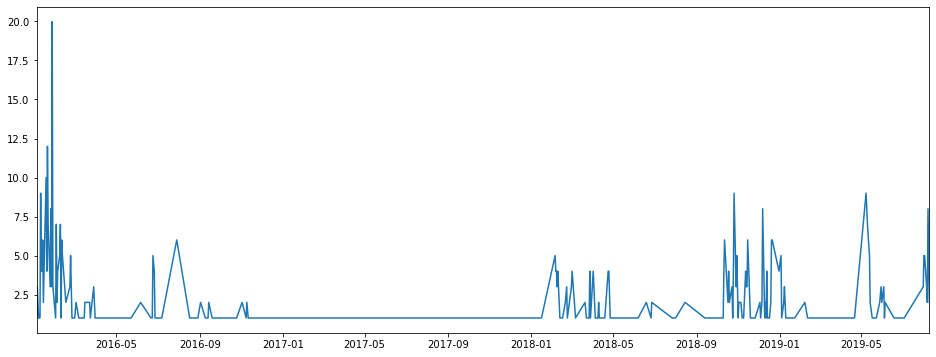

In [553]:
df_subset['count'].plot(figsize=(16,6));

In [227]:
from nltk.stem import PorterStemmer

In [342]:
stemmer = PorterStemmer()

In [357]:
stemmed_titles = []
for j in range(0, df_test_2.shape[0]):
#     for i in range(1, len(df_test_2.tokenised_title[j])+1):
        stemmed_titles.append(stemmer.stem(str(df_test_2.tokenised_title[j])))

In [358]:
df_test_2['stemmed_titles'] = stemmed_titles

In [262]:
stemmer.stem('tariffs')

'tariff'

In [264]:
import spacy

In [265]:
sp = spacy.load('en_core_web_sm')

In [360]:
lemmed_titles = []
for list in df_test_2.tokenised_title:
    lemmed_list  =[]
    for word in list:
        lemmed_list.append(word.lemma_)
    lemmed_titles.append(str(lemmed_list))
    

In [361]:
df_test_2['lemmed_titles'] = lemmed_titles

In [417]:
df_test_2.pct_sig_ch_high_low

2016-01-03 23:18:00+00:00    0
2016-01-03 23:19:00+00:00    0
2016-01-04 00:26:00+00:00    0
2016-01-04 11:42:00+00:00    0
2016-01-04 17:31:00+00:00    0
                            ..
2019-08-09 12:03:00+00:00    1
2019-08-09 12:03:00+00:00    1
2019-08-09 18:44:00+00:00    0
2019-08-09 18:44:00+00:00    0
2019-08-12 04:01:00+00:00    0
Name: pct_sig_ch_high_low, Length: 7571, dtype: int64

In [419]:
import pickle

In [420]:
pickle.dump(df_test_2[['text_lower', 'pct_sig_ch_high_low']],open('test.pkl', 'wb'))

In [418]:
df_test_2[['text_lower', 'pct_sig_ch_high_low']]

,text_lower,pct_sig_ch_high_low
2016-01-03 23:18:00+00:00,the worst thing hillary could do is have her h...,0
2016-01-03 23:19:00+00:00,"by the way, hillary &amp; the msm forgot to me...",0
2016-01-04 00:26:00+00:00,"""@icareeguns: this #iowan is voting for @reald...",0
2016-01-04 11:42:00+00:00,"""@rhettriley1234: trump only wins with our vot...",0
2016-01-04 17:31:00+00:00,"i look forward to being in lowell, massachuset...",0
2016-01-04 20:00:00+00:00,"woody johnson, owner of the nyjets, is @jebbus...",0
2016-01-05 02:20:00+00:00,"the rally in lowell, massachusetts, was amazin...",0
2016-01-05 02:22:00+00:00,"""@troyconway: now 2-more it firms going over s...",0
2016-01-05 02:28:00+00:00,"""@thecybermenace: @realdonaldtrump donald trum...",0
2016-01-05 03:33:00+00:00,"""@samuelghaddad: wow! let's hear it for the fa...",0


In [437]:
df_test_2.to_csv('sp500_trump.csv')

In [438]:
df_test_2.columns

Index(['index', 'favorite_count', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'retweet_count', 'id_str', 'Symbol', 'VOL_x', 'Open',
       'High', 'Low', 'Close', 'Volume', 'price_0', 'max_price0', 'min_price0',
       'price_1', 'max_price1', 'min_price1', 'price_2', 'max_price2',
       'min_price2', 'price_3', 'max_price3', 'min_price3', 'price_4',
       'max_price4', 'min_price4', 'price_5', 'max_price5', 'min_price5',
       'volume_0_x_x', 'volume_1', 'volume_2', 'volume_3', 'volume_4',
       'volume_5', 'volume_6', 'volume_7', 'volume_8', 'volume_9', 'volume_10',
       'volume_11', 'volume_12', 'volume_13', 'volume_14', 'volume_15',
       'volume_16', 'volume_17', 'volume_18', 'volume_19', 'volume_20',
       'pct_sig_ch_high_low', 'pct_sig_ch_open_close',
       'mean_daily daily_volume', 'hourly_mean_volume_specific',
       'hourly_mean_volume_general', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 

# QUEST FOR BINARY KEY WORDS FOR BOTH CLASSIFIERS 

In [148]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [157]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['http', 'https', 'realdonaldtrump', 'co', 'people', 'trump', 'thank', 'new'\
         'today', 'amp', 'president', 'new', 'today']

In [368]:
cvec_full = CountVectorizer(strip_accents='unicode', stop_words=stop)
X_all_full = cvec_full.fit_transform(df_test_2.lemmed_titles)

In [369]:
len(cvec_full.get_feature_names())

9706

In [370]:
cv_df = pd.DataFrame(X_all_full.toarray(), columns=cvec_full.get_feature_names())
freq_full = pd.DataFrame(cv_df.sum().sort_values(ascending=False))

In [371]:
freq_full[freq_full.index.str.contains(r'tariff')]

,0
tariff,50
tariffed,1


In [ ]:
# Now to do NLP on those tweets that DID change significantly to highlight any pattern

# 1) OPEN_CLOSE

In [372]:
df_test_2.pct_sig_ch_open_close.value_counts()

 0    7240
-1     186
 1     145
Name: pct_sig_ch_open_close, dtype: int64

In [373]:
df_subset_open_close = df_test_2[df_test_2.pct_sig_ch_open_close.abs()==1][['lemmed_titles']]

In [374]:
stop = stopwords.words('english')
stop += ['http', 'https', 'realdonaldtrump', 'co', 'people', 'trump', 'thank', 'new'\
         'today', 'amp', 'president', 'new', 'today']

In [376]:
cvec_open_close = CountVectorizer(strip_accents='unicode', stop_words=stop, min_df=2)
X_all_open_close = cvec_open_close.fit_transform(df_subset_open_close.lemmed_titles)

In [377]:
len(cvec_open_close.get_feature_names())

443

In [378]:
cv_open_close = pd.DataFrame(X_all_open_close.toarray(), columns=cvec_open_close.get_feature_names())
freq_open_close = pd.DataFrame(cv_open_close.sum().sort_values(ascending=False))

In [379]:
freq_open_close.shape

(443, 1)

In [382]:
freq_open_close[freq_open_close.index.str.contains(r'tariff')]

,0
tariff,6


In [383]:
ratios_open_close = pd.merge(freq_open_close, freq_full, left_index=True, right_index=True)

In [384]:
ratios_open_close

,0_x,0_y
great,43,1278
china,21,159
cruz,18,140
state,17,400
want,17,248
good,15,263
watch,14,191
time,13,316
iowa,13,63
get,13,225


In [385]:
ratios_open_close['ratio'] = ratios_open_close['0_x']/ratios_open_close['0_y']

In [386]:
ratios_open_close.columns = ['#sig', '#insig', 'ratio']

In [387]:
ratios_open_close.sort_values('ratio', ascending=False)

,#sig,#insig,ratio
constructive,2,2,1.000000
gallagher,2,2,1.000000
momentum,2,2,1.000000
edwin,2,2,1.000000
vision,2,2,1.000000
eddie,2,2,1.000000
mental,2,3,0.666667
lamestream,2,3,0.666667
update,3,5,0.600000
february,3,5,0.600000


In [388]:
key_words_open_close = ratios_open_close[(ratios_open_close['#sig']>=5) & (ratios_open_close['ratio']>=0.1)]

In [389]:
key_words_open_close

,#sig,#insig,ratio
china,21,159,0.132075
cruz,18,140,0.128571
iowa,13,63,0.206349
leave,11,110,0.100000
bush,11,39,0.282051
jeb,9,33,0.272727
crowd,8,71,0.112676
te,8,54,0.148148
hampshire,7,38,0.184211
weak,7,61,0.114754


# REPEAT FOR HIGH VS. LOW

In [390]:
df_test_2.pct_sig_ch_high_low.value_counts()

 0    7045
-1     346
 1     180
Name: pct_sig_ch_high_low, dtype: int64

In [391]:
df_subset_high_low = df_test_2[df_test_2.pct_sig_ch_high_low.abs()==1][['lemmed_titles']]

In [392]:
stop = stopwords.words('english')
stop += ['http', 'https', 'realdonaldtrump', 'co', 'people', 'trump', 'thank', 'new'\
         'today', 'amp', 'president', 'new', 'today']

In [394]:
cvec_high_low = CountVectorizer(strip_accents='unicode', stop_words=stop, min_df=2)
X_all_high_low = cvec_high_low.fit_transform(df_subset_high_low.lemmed_titles)

In [395]:
len(cvec_high_low.get_feature_names())

662

In [396]:
cv_high_low = pd.DataFrame(X_all_high_low.toarray(), columns=cvec_high_low.get_feature_names())
freq_high_low = pd.DataFrame(cv_high_low.sum().sort_values(ascending=False))

In [397]:
freq_high_low.shape

(662, 1)

In [398]:
ratios_high_low = pd.merge(freq_high_low, freq_full, left_index=True, right_index=True)

In [399]:
ratios_high_low

,0_x,0_y
great,75,1278
state,29,400
china,28,159
big,25,408
cruz,25,140
country,23,364
watch,23,191
trump2016,22,217
america,21,384
get,20,225


In [400]:
ratios_high_low['ratio'] = ratios_high_low['0_x']/ratios_high_low['0_y']

In [401]:
ratios_high_low.columns = ['#sig', '#insig', 'ratio']

In [402]:
ratios_high_low.sort_values('ratio', ascending=False)

,#sig,#insig,ratio
momentum,2,2,1.000000
edwin,2,2,1.000000
vision,2,2,1.000000
brigitte,2,2,1.000000
nro,2,2,1.000000
electionnight,2,2,1.000000
mad,2,2,1.000000
constructive,2,2,1.000000
eddie,2,2,1.000000
gallagher,2,2,1.000000


In [405]:
key_words_high_low = ratios_high_low[(ratios_high_low['#sig']>=4)\
                                       & (ratios_high_low['ratio']>=0.15)]

In [512]:
key_words_high_low.sort_values('#sig', ascending=False).to_csv('plot_2.csv')

In [205]:
key_words_open_close.shape

(25, 3)

In [421]:
# Extract the cvec for the following words above #

In [434]:
binary_words = cv_all[['discussion', 'fitn', 'jeb', 'bush', 'missile', 'hampshire', 'respected',\
'iowa', 'oil', 'graham', 'marine', 'waste', 'tariff', 'inform', 'syria',\
        'votetrump', 'canada', 'congressman', 'east', 'disgrace', 'little',\
        'safety', 'problem', 'buy', 'china', 'cruz', 'ted', 'crowd', 'spend'
       ]]

In [435]:
binary_words.to_csv('binary_words.csv')

In [214]:
cv_all[cv_all.columns.str.contains(r'tariff')]

ValueError: Item wrong length 15100 instead of 7571.

In [ ]:
# Using N-Grams=1

In [487]:
stop = stopwords.words('english')
stop += ['http', 'https', 'realdonaldtrump', 'co', 'people', 'trump', 'thank', 'new'\
         'today', 'amp', 'president', 'new', 'today', 'idea', '']

In [505]:
cvec = CountVectorizer(strip_accents='unicode', stop_words=stop, min_df=5)
X_final = cvec.fit_transform(df_subset.text)

In [506]:
cv_final = pd.DataFrame(X_final.toarray(), columns=cvec.get_feature_names())
freq_sig = pd.DataFrame(cv_final.sum().sort_values(ascending=False))

In [507]:
freq_sig.shape

(263, 1)

In [497]:
#Full dataset

In [508]:
cvec = CountVectorizer(strip_accents='unicode', stop_words=stop, min_df=5)
X_full = cvec.fit_transform(df_test_2.text)

In [509]:
cv_full = pd.DataFrame(X_full.toarray(), columns=cvec.get_feature_names())
freq_full = pd.DataFrame(cv_full.sum().sort_values(ascending=False))

In [510]:
freq_full.shape

(2435, 1)

In [501]:
#Merging

In [511]:
ratios_final = pd.merge(freq_sig, freq_full, right_index=True, left_index=True)

In [512]:
ratios_final.columns = ['#sig', '#insig']
ratios_final['ratio'] = ratios_final['#sig']/ratios_final['#insig']

In [516]:
ratios_final.sort_values('ratio', ascending=False).head(20)

,#sig,#insig,ratio
votetrumpnh,5,6,0.833333
jebbush,9,13,0.692308
fitn,11,17,0.647059
hampshire,16,38,0.421053
bush,15,39,0.384615
jeb,11,33,0.333333
idea,5,15,0.333333
tariffs,14,43,0.325581
message,5,16,0.312500
sent,5,17,0.294118


In [517]:
ratios_final.sort_values('#sig', ascending=False).head(20)

,#sig,#insig,ratio
great,92,1233,0.074615
trump2016,29,229,0.126638
china,28,159,0.176101
country,28,317,0.088328
cruz,28,140,0.200000
many,26,277,0.093863
hillary,24,390,0.061538
time,24,252,0.095238
big,23,349,0.065903
one,23,227,0.101322


In [522]:
key_words = ratios_final[(ratios_final['#sig']>=10) & (ratios_final['ratio']>=0.1)]

In [524]:
key_words.sort_values('ratio', ascending=False) # Plot this graph? Are these tweets too political?

,#sig,#insig,ratio
fitn,11,17,0.647059
hampshire,16,38,0.421053
bush,15,39,0.384615
jeb,11,33,0.333333
tariffs,14,43,0.325581
iowa,17,63,0.269841
congressman,11,45,0.244444
man,11,50,0.220000
highly,10,47,0.212766
office,10,49,0.204082


In [525]:
# Is 20 minutes too long? Are we expecting these political tweets to deeply effect
# the s&p500?

In [551]:
def make_binary_5(df):
    data_list = []
    for i in range(0, df.shape[0]):
        if round(df.iloc[i].min(),5) <=-0.075:
#             print(df.iloc[i].max())
            data_list.append(-1)
        elif round(df.iloc[i].max(),5) >=0.075:
#             print(df.iloc[i].min())
            data_list.append(1)
        else:
            data_list.append(0)
#             print(df.iloc[i].max())
    return data_list

In [552]:
df_5_min_binary = df_final[['price_0_x','price_1_x', 'price_2_x',\
                             'price_3_x', 'price_4_x', 'price_5_x']]

In [24]:
df_final_corr

NameError: name 'df_final_corr' is not defined

In [553]:
df_test_2['pct_sig_ch_5'] = make_binary_5(df_5_min_binary)

In [562]:
df_test_2.pct_sig_ch_5.value_counts()

 0    6922
-1     413
 1     236
Name: pct_sig_ch_5, dtype: int64

In [555]:
subset_5mins = df_test_2[df_test_2.pct_sig_ch_5.abs()==1]

In [556]:
cvec = CountVectorizer(strip_accents='unicode', stop_words=stop, min_df=5)
X_5 = cvec.fit_transform(subset_5mins.text)

In [557]:
cv_f5 = pd.DataFrame(X_5.toarray(), columns=cvec.get_feature_names())
freq_sig5 = pd.DataFrame(cv_f5.sum().sort_values(ascending=False))

In [ ]:
#Merge Dataset

In [558]:
ratios_5 = pd.merge(freq_sig5, freq_full, right_index=True, left_index=True)

In [559]:
ratios_5.columns = ['#sig', '#insig']
ratios_5['ratio'] = ratios_5['#sig']/ratios_5['#insig']

In [ ]:
key_words_5 = ratios_5[(ratios_5['ratio']>=0.10) & (ratios_5['#sig']>=10)]

In [ ]:
key_words_5.index

In [566]:
subset_5mins

,price_0_x,price_1_x,price_2_x,price_3_x,price_4_x,price_5_x,price_6_x,price_7_x,price_8_x,price_9_x,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,pct_sig_ch_5
2016-01-05 18:05:00+00:00,0.113493,0.012596,-0.062964,-0.037802,-0.012607,0.000000,0.075653,-0.012599,-0.012601,-0.050403,...,0,0,0,1,0,0,0,0,0,1
2016-01-06 02:37:00+00:00,-0.037898,-0.037912,-0.012642,-0.075863,-0.012652,-0.215108,-0.063395,0.076123,0.000000,0.050710,...,0,0,0,0,0,0,0,0,0,-1
2016-01-06 15:01:00+00:00,-0.025407,0.000000,-0.025410,-0.076258,-0.050878,0.000000,0.101807,0.000000,-0.076268,0.101768,...,1,0,0,0,0,0,0,0,0,-1
2016-01-06 19:22:00+00:00,-0.076190,-0.025413,0.012711,0.012710,-0.038119,-0.025423,0.038139,-0.063532,0.025432,0.038139,...,0,0,0,0,1,0,0,0,0,-1
2016-01-06 19:22:00+00:00,-0.076190,-0.025413,0.012711,0.012710,-0.038119,-0.025423,0.038139,-0.063532,0.025432,0.038139,...,0,0,0,0,1,0,0,0,0,-1
2016-01-06 21:09:00+00:00,0.038129,0.025410,0.000000,0.025400,-0.088889,0.012708,0.012706,0.025413,-0.038105,0.050832,...,0,0,0,0,0,0,1,0,0,-1
2016-01-07 11:15:00+00:00,-0.012994,-0.064986,0.065028,0.090980,-0.051941,-0.038971,-0.038986,-0.130005,0.026035,0.065070,...,0,0,0,0,0,0,0,0,0,1
2016-01-07 16:30:00+00:00,0.000000,0.051467,-0.025717,-0.102894,0.115875,-0.077151,-0.025737,0.064358,0.012865,0.051454,...,0,1,0,0,0,0,0,0,0,-1
2016-01-07 21:11:00+00:00,-0.052178,0.013051,-0.013048,0.052199,-0.143491,0.104493,0.000000,-0.039154,-0.013055,-0.026116,...,0,0,0,0,0,0,1,0,0,-1
2016-01-08 15:57:00+00:00,0.039068,0.039052,0.000000,-0.091087,0.143266,-0.039012,-0.065036,0.013016,-0.039042,0.052070,...,1,0,0,0,0,0,0,0,0,-1


In [ ]:
# Start Feature Engineering #

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['http', 'https', 'realdonaldtrump', 'co', 'people', 'trump', 'thank', 'new'\
         'today', 'amp', 'president', 'new', 'today', 'last', 'night', 'right', 'let'\
        'highly']

In [22]:
cvec = CountVectorizer(strip_accents='unicode', stop_words=stop)
X_all = cvec.fit_transform(df_full_corr.text)

In [23]:
cv_all = pd.DataFrame(X_all.toarray(), columns=cvec.get_feature_names())